[ -8.67692308 -44.61538462 115.13846154 -63.93846154   4.61538462
  -2.52307692] [  0.         -13.01538462 -79.93846154  92.76923077  -3.13846154
   3.78461538   0.        ] [ -1.83076923  -8.33846154 -54.81538462 -48.4         -3.58461538
  -3.26153846] [70. 68. 55. 22. 13. 11.]
[[ -8.67692308   0.          -1.83076923  70.        ]
 [-44.61538462 -13.01538462  -8.33846154  68.        ]
 [115.13846154 -79.93846154 -54.81538462  55.        ]
 [-63.93846154  92.76923077 -48.4         22.        ]
 [  4.61538462  -3.13846154  -3.58461538  13.        ]
 [ -2.52307692   3.78461538  -3.26153846  11.        ]]


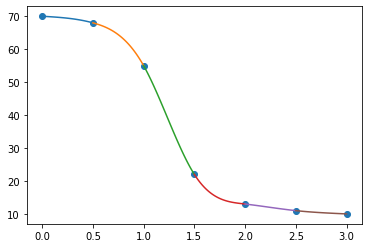

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import copy

Z = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
T = np.array([70.0, 68.0, 55.0, 22.0,13.0,11.0,10.0])

n = len(Z)
H = [] 
D = np.zeros(n)


for i in range (n-1):
  H.append(Z[i+1]-Z[i])
  
matriz = np.zeros([n,n])

for i in range (1,n-1):   #ojo que la posicion M[n] no existe 
  matriz[i,i-1] = H[i-1]
  matriz[i,i] = 2 * (H[i] + H[i-1])
  matriz[i,i+1] = H[i]
  D[i] = (T[i+1]-T[i])/H[i]-(T[i]-T[i-1])/H[i-1] #Si arranca en 0 , cuenta desde atras los H[-1]  ,

D[0] = 0
D[n-1] = 0

D = D * 3  
matriz[0,0] = 1
matriz[n-1,n-1] = 1

b = np.linalg.solve(matriz,D)

d = np.zeros(n-1)
a = np.zeros(n-1)
c = np.zeros(n-1)

# Sol = d + a() + b() + c ()

for i in range (n-1):
    d[i] = T[i]
    a[i] = (1/3) * (b[i+1]-b[i])/H[i]
    c[i] = ((T[i+1]-T[i])/H[i]) - b[i] * H[i] - (H[i]**2) * a[i]

print(a,b,c,d)
P=np.append(a,b[0:n-1])
P=np.append(P,c[0:n-1])
P=np.append(P,d[0:n-1])
PP=(P.reshape(4,n-1)).T
print(PP)

for i in range (n-1):
    x = np.linspace(Z[i],Z[i+1],100)
    y = np.polyval(PP[i] , x - Z[i])
    plt.plot(x,y)

plt.scatter(Z,T)
plt.show()  



In [ ]:
A = np.array([[1,0],[3,4]])
print(A)
L = np.transpose(A)
print(L)